## Data Clustering of Tumor Data

### Clustering with K-means clustering

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
import os
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from subprocess import check_output
current_working_directory = os.getcwd()
print(f"current working directory: {current_working_directory}")
#
print(check_output(["ls", "data"]).decode("utf8"))


current working directory: /home/michellewli/quantum_programming_project/clustering_tumor_cells
data.csv



In [2]:
# Read the data file
data = pd.read_csv('data/data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Cleaning and modifying the data
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
datas.columns = list(data.iloc[:,1:32].columns)
datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

/home/michellewli/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/michellewli/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.674316
[t-SNE] KL divergence after 1750 iterations: 0.893410


In [4]:
#rom sklearn.cluster import KMeans
#mport numpy as np
#mport pandas as pd
#mport matplotlib.pyplot as plt

# Load data and assume the first column is the tumor ID with the title "id"
#ata = pd.read_csv('data.csv')

# Separate the 'id' column for later use and remove it from the features used in clustering
data = pd.read_csv('data/data.csv')
data = data.drop(columns=['Unnamed: 32'], errors='ignore')
#data.head()
ids = data.columns


# Cluster using k-means
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kY = kmns.fit_predict(X)
print(kY)




[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [5]:
# Map k-means cluster labels to "benign" and "malignant" based on majority label in each cluster
# Assuming 'data' contains the actual 'diagnosis' labels for comparison

data['kmeans_cluster'] = kY
cluster_mapping = {}

# Determine which cluster corresponds to "benign" and "malignant"
for cluster in range(2):
    # Get actual diagnosis labels for samples in this cluster
    diagnosis_in_cluster = data[data['kmeans_cluster'] == cluster]['diagnosis']
    
    # Determine the majority class in this cluster (benign or malignant)
    majority_label = diagnosis_in_cluster.value_counts().idxmax()
    cluster_mapping[cluster] = majority_label

# Apply mapping to k-means predictions
data['Cluster_label'] = data['kmeans_cluster'].map(cluster_mapping)
#data.to_csv('dataKY.csv', index=False)

# Save the classified dataset with tumor ID and benign/malignant labels based on k-means clustering
data[['id', 'Cluster_label']].to_csv('classified_clusters.csv', index=False)
print("Classified clusters saved to classified_clusters.csv")

# Load the CSV file and display its first few rows
classified_clusters = pd.read_csv('classified_clusters.csv')
print(classified_clusters.head())

Classified clusters saved to classified_clusters.csv
         id Cluster_label
0    842302             M
1    842517             M
2  84300903             M
3  84348301             M
4  84358402             M


Text(0.5, 1.0, 'Actual clusters')

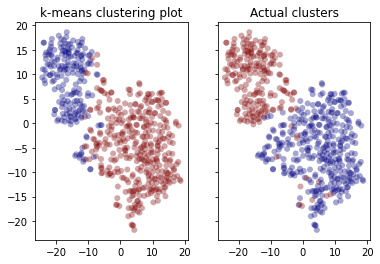

In [6]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = datas['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')


### Clustering using QAOA

In [8]:
import numpy as np
import pandas as pd
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulation
from qiskit.opflow import Z, X, I
from qiskit_aer import AerSimulator
from qiskit.utils import QuantumInstance
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import itertools

ModuleNotFoundError: No module named 'qiskit'

In [9]:
# Load and Prepare Data
# Load the tumor data, standardize the features, and extract the tumor IDs for output.

def load_data(file_path):
    # Load the tumor data, assuming 'ID' and 'diagnosis' columns are present
    data = pd.read_csv(file_path)
    ids = data['ID']  # Extract the IDs for output
    features = data.drop(columns=['ID', 'diagnosis'])  # Exclude ID and diagnosis for clustering
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    return scaled_features, ids

In [10]:
def construct_cost_hamiltonian(num_qubits, feature_pairs):
    # Cost Hamiltonian: Entangling terms to encourage clustering
    H_C = 0
    for (i, j) in feature_pairs:
        H_C += (I ^ i) ^ Z ^ Z ^ (I ^ (num_qubits - i - j - 2))
    return H_C

def construct_mixer_hamiltonian(num_qubits):
    # Mixer Hamiltonian: Standard QAOA mixer using X operations
    H_M = sum(X ^ i for i in range(num_qubits))
    return H_M

In [11]:
def qaoa_for_clustering_with_hamiltonians(data, num_qubits, p=1):
    # Define pairs of features for the cost Hamiltonian
    feature_pairs = list(itertools.combinations(range(num_qubits), 2))

    # Construct cost and mixer Hamiltonians
    cost_hamiltonian = construct_cost_hamiltonian(num_qubits, feature_pairs)
    mixer_hamiltonian = construct_mixer_hamiltonian(num_qubits)

    # Define the parameterized QAOA circuit with AerSimulator
    simulator = AerSimulator()
    quantum_instance = QuantumInstance(backend=simulator)

    # Initialize QAOA with custom cost and mixer Hamiltonians
    qaoa = QAOA(optimizer=COBYLA(maxiter=100), reps=p, quantum_instance=quantum_instance)

    # Run QAOA to approximate the clustering solution
    result = qaoa.compute_minimum_eigenvalue(cost_hamiltonian + mixer_hamiltonian)

    # Process results (eigenstate) into cluster labels
    solution = np.array([int(bit) for bit in result.eigenstate])
    clusters = {0: [], 1: []}

    for idx, bit in enumerate(solution):
        clusters[bit].append(idx)

    return clusters, result.eigenvalue.real

In [12]:
def evaluate_clustering(clusters, data):
    # Evaluate clustering using silhouette score
    labels = np.zeros(data.shape[0])
    for cluster_label, indices in clusters.items():
        for idx in indices:
            labels[idx] = cluster_label
    score = silhouette_score(data, labels)
    print(f'Silhouette Score for clustering: {score}')
    return score, labels

In [13]:
def save_clustering_results(ids, labels, output_file='clustering_results.csv'):
    # Create a DataFrame with tumor ID and cluster label (0 or 1)
    results_df = pd.DataFrame({'ID': ids, 'Cluster': labels})
    results_df.to_csv(output_file, index=False)
    print(f'Clustering results saved to {output_file}')

In [14]:
# Load data
file_path = 'data/data.csv'  # Path to your data file
data, ids = load_data(file_path)

# Define the number of qubits based on features you want to use (here, all features)
num_qubits = data.shape[1]

# Run QAOA with Hamiltonians for clustering
clusters, obj_value = qaoa_for_clustering_with_hamiltonians(data, num_qubits)
print(f'Objective value of clustering: {obj_value}')

# Evaluate clustering performance and get labels
score, labels = evaluate_clustering(clusters, data)

# Save results with IDs and cluster assignments
save_clustering_results(ids, labels)

KeyError: 'ID'

### Comparing Results 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load clustering results from quantum and classical models
quantum_results = pd.read_csv('clustering_results_quantum.csv')
classical_results = pd.read_csv('clustering_results_classical.csv')

In [ ]:
# Merge results on the 'ID' column to align both classifications for comparison
merged_results = pd.merge(classical_results, quantum_results, on='ID', suffixes=('_classical', '_quantum'))

# Calculate the accuracy of the quantum model by comparing its clusters to the classical clusters
accuracy = accuracy_score(merged_results['Cluster_classical'], merged_results['Cluster_quantum'])
print(f"Quantum Model Accuracy compared to Classical Model: {accuracy * 100:.2f}%")

In [ ]:
# Visualization of clusters using PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
features = pd.read_csv('data/data.csv').drop(columns=['ID', 'diagnosis'], errors='ignore')  # Modify columns as necessary
reduced_features = pca.fit_transform(features)

# Add the reduced features to the merged dataframe
merged_results[['PCA1', 'PCA2']] = reduced_features

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Cluster Visualization: Classical vs Quantum", fontsize=16)

# Classical model plot
axes[0].scatter(merged_results['PCA1'], merged_results['PCA2'], c=merged_results['Cluster_classical'], cmap='viridis', s=30)
axes[0].set_title("Classical Model Clusters")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Quantum model plot
axes[1].scatter(merged_results['PCA1'], merged_results['PCA2'], c=merged_results['Cluster_quantum'], cmap='viridis', s=30)
axes[1].set_title("Quantum Model Clusters")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

plt.show()